In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dados = pd.read_csv('Coffee_Qlty.csv')
dados_numericos_e_continente = pd.concat([dados.select_dtypes(include=[np.number]), dados[['Continent.of.Origin']]], axis=1)
qualidade_por_continente = dados_numericos_e_continente.groupby('Continent.of.Origin').mean()

In [15]:
metricas_traduzidas = {
    'Aroma': 'Aroma',
    'Flavor': 'Sabor',
    'Acidity': 'Acidez',
    'Body': 'Corpo',
    'Balance': 'Equilíbrio',
    'Uniformity': 'Uniformidade',
    'Clean.Cup': 'Xícara Limpa',
    'Sweetness': 'Doçura'
}

regioes_traduzidas = [
    'África',
    'Ásia',
    'América Norte',
    'Oceania',
    'América Sul'
]

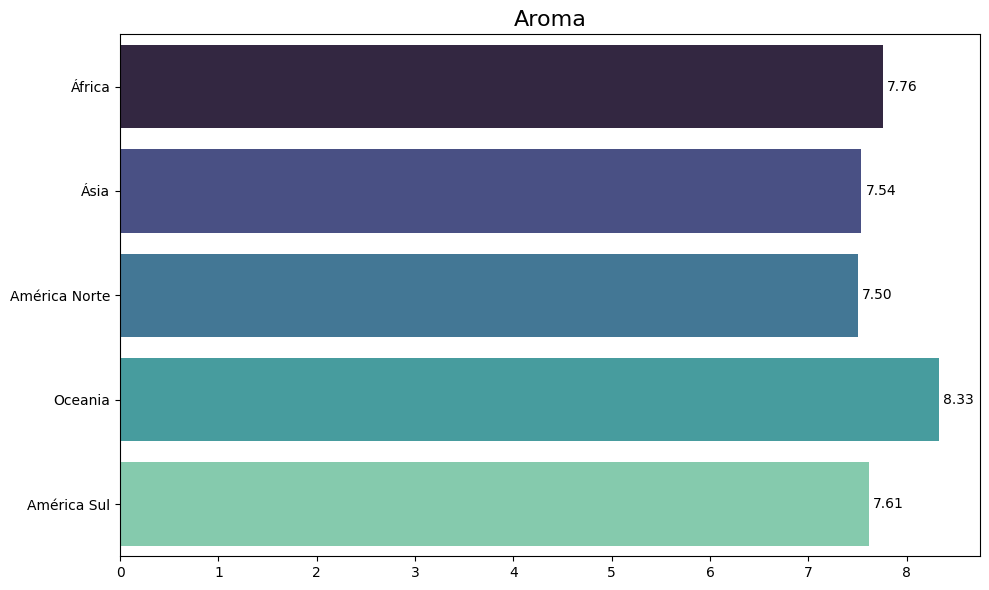

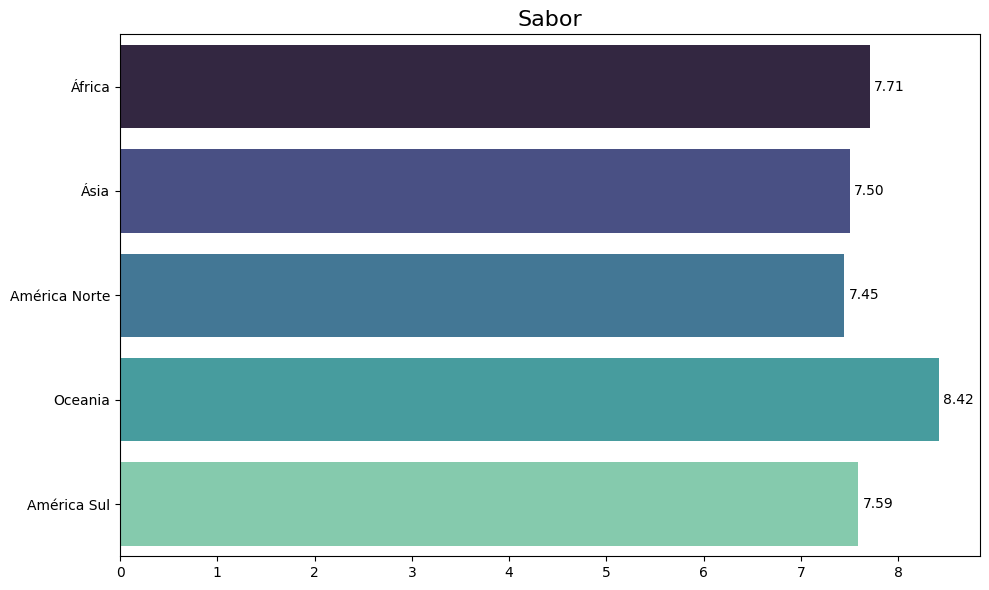

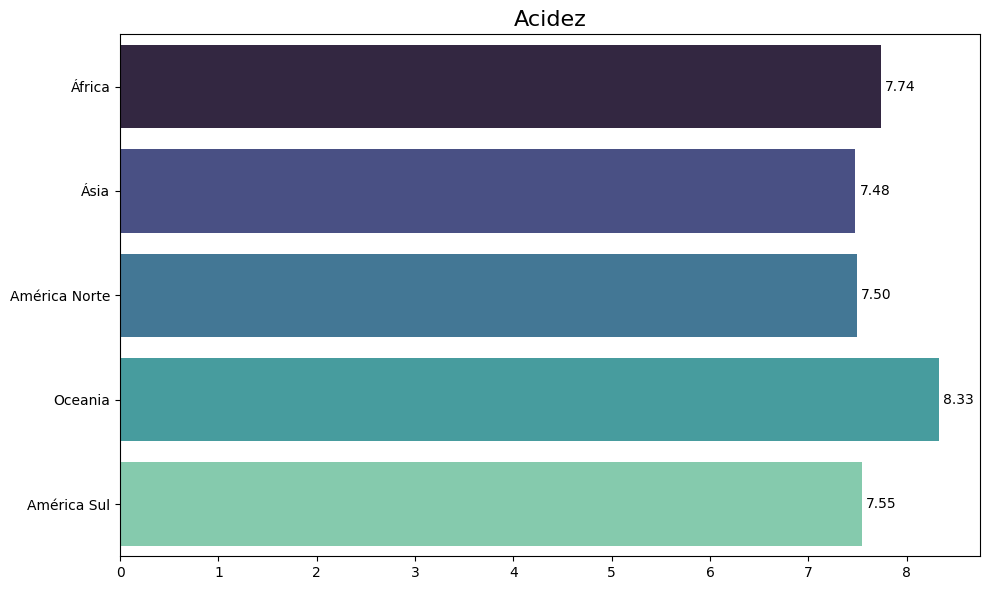

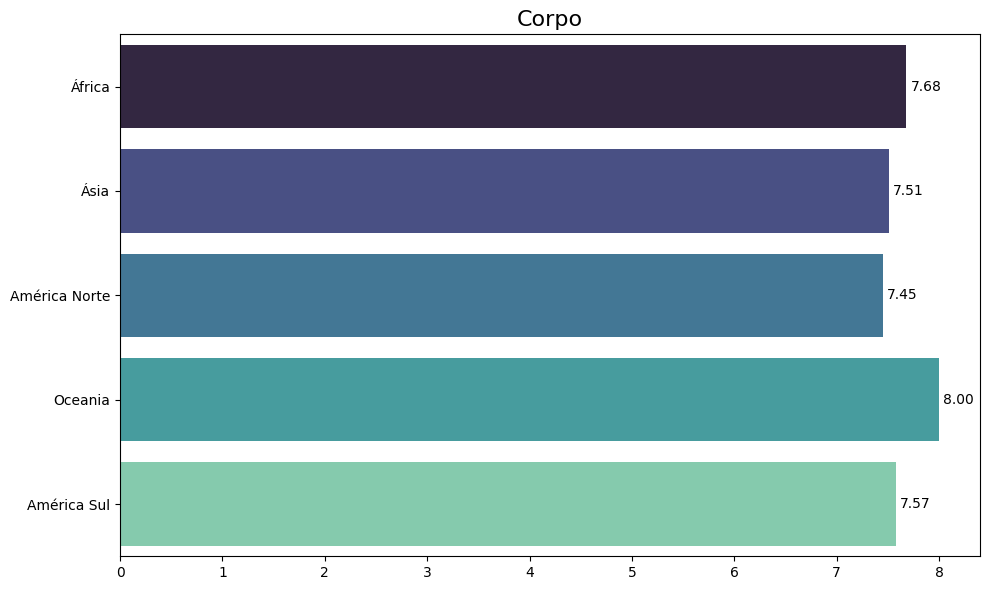

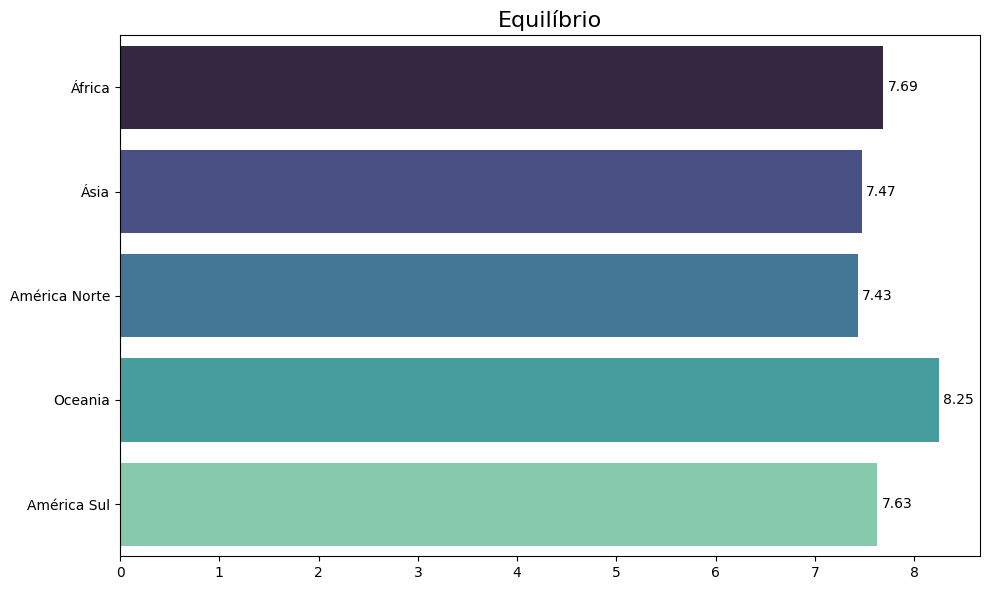

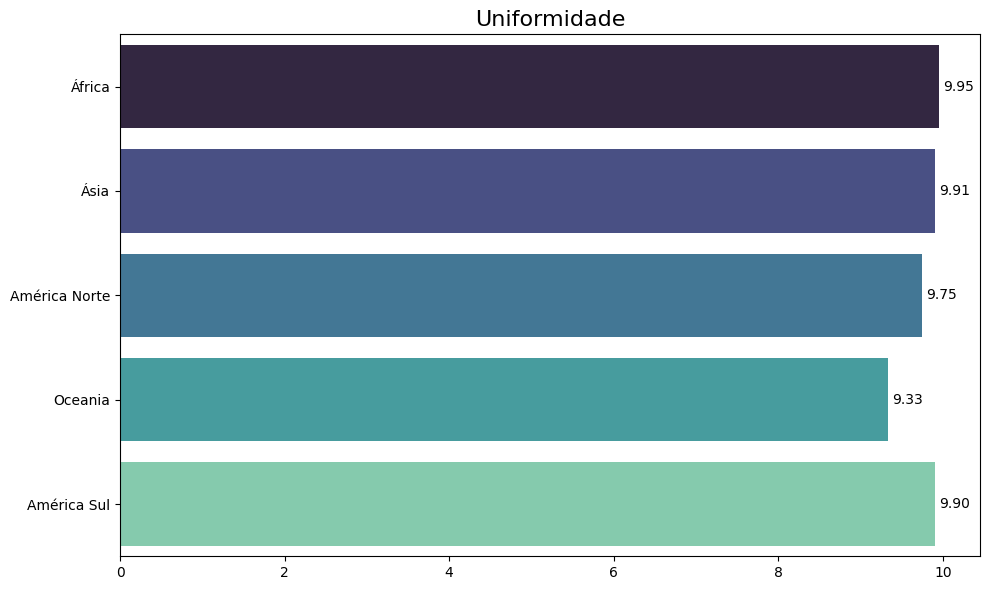

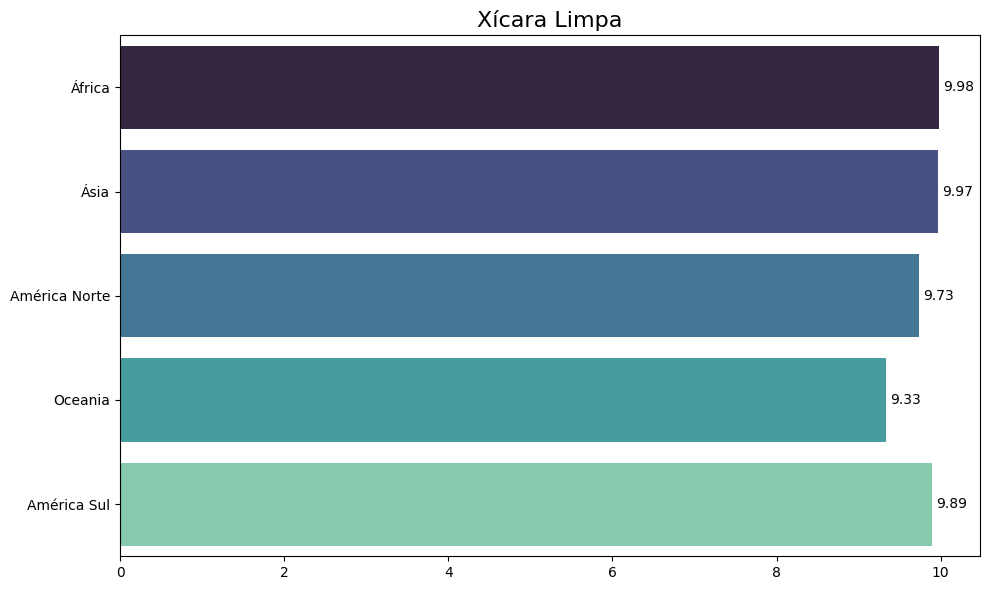

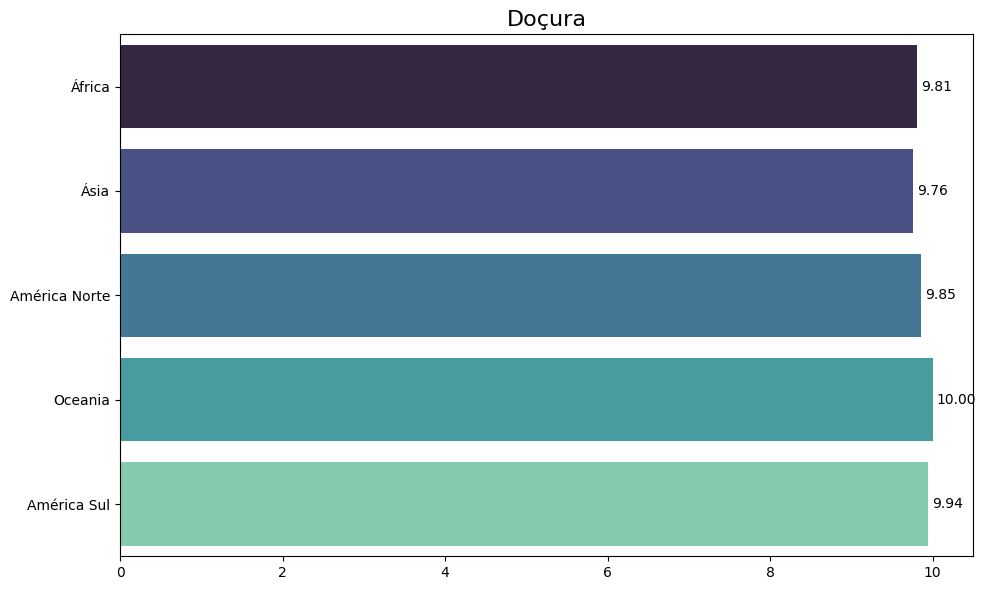

In [21]:
for metrica_ingles, metrica_portugues in metricas_traduzidas.items():
    plt.figure(figsize=(10, 6))
    
    sns.barplot(
        x=qualidade_por_continente[metrica_ingles], 
        y=regioes_traduzidas, 
        palette="mako",
        legend=False,
        hue=regioes_traduzidas
    )
    
    plt.title(metrica_portugues, fontsize=16)
    plt.xlabel('', fontsize=10)
    plt.ylabel('', fontsize=14)
    
    ax = plt.gca()
    for bar in ax.patches:
        ax.annotate(
            format(bar.get_width(), '.2f'), 
            (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
            ha='left', 
            va='center', 
            xytext=(3, 0), 
            textcoords='offset points'
        )

    with open (f'data/graficos/qualidade_por_continente_{metrica_portugues}.png', 'wb') as file:
        plt.savefig(file)
    
    plt.tight_layout()
    plt.show()